In [12]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# For visualizing feature importance
import shap

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/laptop.csv')

In [15]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [16]:
df.shape

(1303, 13)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


In [20]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [21]:
df.head()

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [22]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('Kg' , '')

In [23]:
print(df.columns)
# sns.histplot(df['Company'],bins =20 , kde =True)
# plt.xlabel('Company')
# plt.ylable('Ram')
# plt.title('Distribution of Processor Types')
# plt.show()

Index(['Unnamed: 0.1', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [24]:
df.drop(columns = ['Unnamed: 0.1'],inplace = True)

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [26]:
print(df.describe())
print(df['Ram'].value_counts())

               Price
count    1273.000000
mean    59955.814073
std     37332.251005
min      9270.720000
25%     31914.720000
50%     52161.120000
75%     79333.387200
max    324954.720000
Ram
8     601
4     367
16    194
6      40
12     25
2      22
32     17
64      3
24      3
1       1
Name: count, dtype: int64


BoxPlot


In [27]:
# sns.boxplot(x = 'RAM' , data = df)
# plt.xlabel('RAM (GB)' )
# plt.title('RAM Boxplot')
# plt.show()

LabelEncoder


3.Encode Categorical Variables

In [28]:
import pandas as pd

# Sample DataFrame
data = {'Brand': ['Dell', 'HP', 'Apple', 'Dell', 'HP'],
        'RAM': [8, 16, 8, 32, 16],
        'Price': [500, 600, 1200, 900, 700]}

df = pd.DataFrame(data)

# One-Hot Encoding the 'Brand' column
df_encoded = pd.get_dummies(df, columns=['Brand'], drop_first=True)  # drop_first=True avoids multicollinearity
print(df_encoded)


from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
data = {'OS': ['Windows', 'MacOS', 'Linux', 'Windows', 'Linux'],
        'Price': [500, 1200, 300, 800, 400]}

df = pd.DataFrame(data)

# Label Encoding the 'OS' column
label_encoder = LabelEncoder()
df['OS_Encoded'] = label_encoder.fit_transform(df['OS'])
print(df)

   RAM  Price  Brand_Dell  Brand_HP
0    8    500        True     False
1   16    600       False      True
2    8   1200       False     False
3   32    900        True     False
4   16    700       False      True
        OS  Price  OS_Encoded
0  Windows    500           2
1    MacOS   1200           1
2    Linux    300           0
3  Windows    800           2
4    Linux    400           0


4.Scale Numerical Features

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/laptop.csv')

# Display information about the dataset
df.info()

# Selecting Numerical Columns to Scale
numerical_columns = ['Ram', 'Memory', 'Price']

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the numerical features using StandardScaler
df_standard_scaled = df.copy()  # Make a copy of the original DataFrame
# df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

print("Standard Scaled Data:")
print(df_standard_scaled.head())  # Display first 5 rows of scaled data

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the numerical features using MinMaxScaler
df_minmax_scaled = df.copy()  # Make a copy of the original DataFrame
# df_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])

print("\nMinMax Scaled Data:")
print(df_minmax_scaled.head())  # Display first 5 rows of scaled data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
Standard Scaled Data:
   Unnamed: 0.1  Unnamed: 0 Company   TypeName Inches  \
0             0         0.0   Apple  Ultrabo

5.Split the data into training and testing Sets

In [30]:
from sklearn.model_selection import train_test_split

# Drop the unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

# Define the feature columns (excluding 'Price') and the target column ('Price')
X = df_cleaned.drop(columns=['Price'])
y = df_cleaned['Price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1042, 10) (261, 10) (1042,) (261,)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


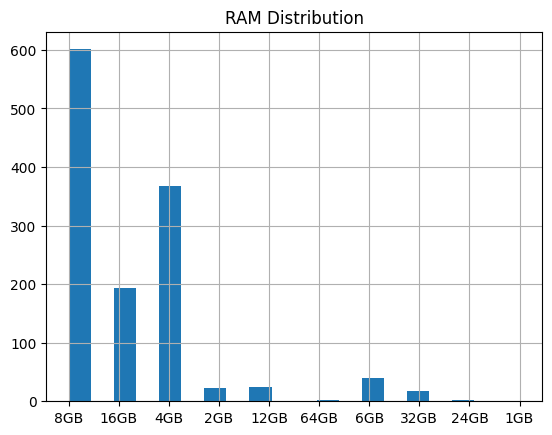

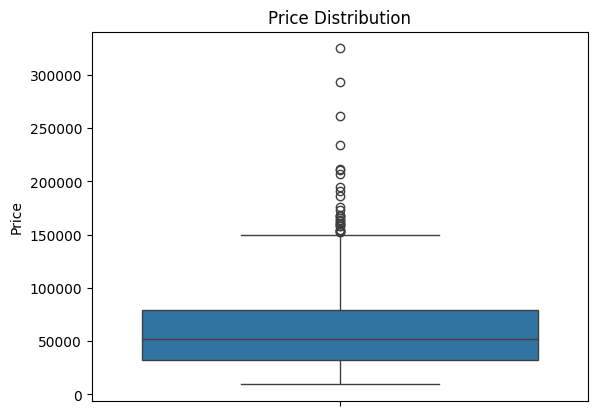

ValueError: could not convert string to float: 'Apple'

<Figure size 1000x800 with 0 Axes>

In [32]:
# import pandas as pd
# df = pd.read_csv('/content/laptop.csv')
# df.info()  # Get an overview of the dataset
# df.head()  # Preview the data
# df.describe()  # For numerical features
# df.describe(include=['O'])  # For categorical features
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Histogram of laptop prices
# sns.histplot(df['Price'], bins=30)
# plt.show()

# # # Correlation heatmap
# # plt.figure(figsize=(10, 8))
# # sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# # plt.show()

# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Plot the boxplot for 'Price'
# sns.boxplot(df['Price'])
# plt.show()

# # Remove outliers using IQR method
# Q1 = df['Price'].quantile(0.25)
# Q3 = df['Price'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[(df['Price'] >= (Q1 - 1.5 * IQR)) & (df['Price'] <= (Q3 + 1.5 * IQR))]

# # Encode categorical columns
# # For 'Brand', 'Operating System', etc., you can use pd.get_dummies or LabelEncoder
# df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encoding of categorical variables

# # Plot the correlation heatmap for numeric features
# plt.figure(figsize=(10, 8))
# sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
# plt.show()
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/laptop.csv")

# Examine the structure
df.info()

# Summary statistics
df.describe()

# Visualizations
# Histogram of key features (RAM, processor type, etc.)
df['Ram'].hist(bins=20)
plt.title('RAM Distribution')
plt.show()

# Boxplot for price distribution
sns.boxplot(df['Price'])
plt.title('Price Distribution')
plt.show()

# Correlation heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


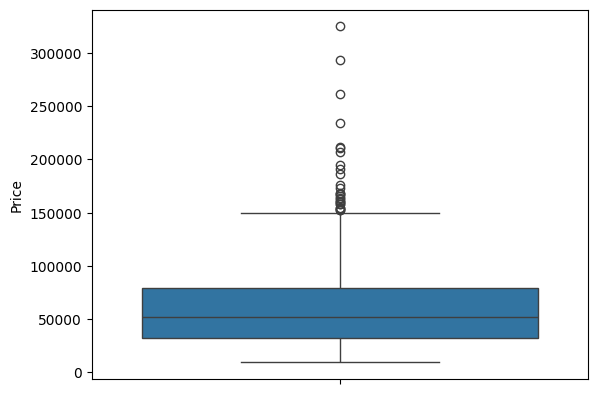

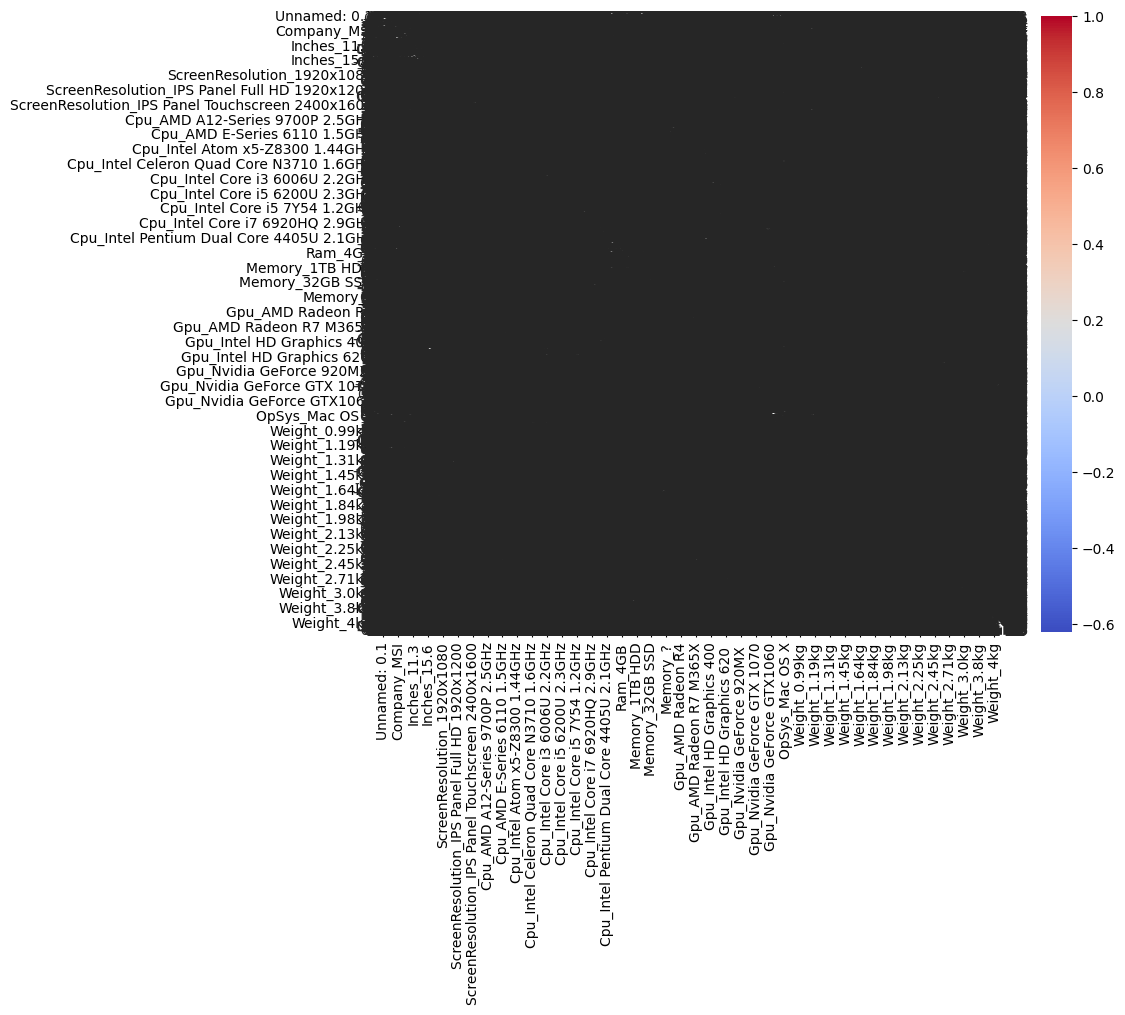

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot the boxplot for 'Price'
sns.boxplot(df['Price'])
plt.show()

# Remove outliers using IQR method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price'] >= (Q1 - 1.5 * IQR)) & (df['Price'] <= (Q3 + 1.5 * IQR))]

# Encode categorical columns
# For 'Brand', 'Operating System', etc., you can use pd.get_dummies or LabelEncoder
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encoding of categorical variables

# Plot the correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

Encode Categorical Value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None
       Unnamed: 0.1   Unnamed: 0          Price
count    1303.00000  1273.000000    1273.000000
mean      651.00000   

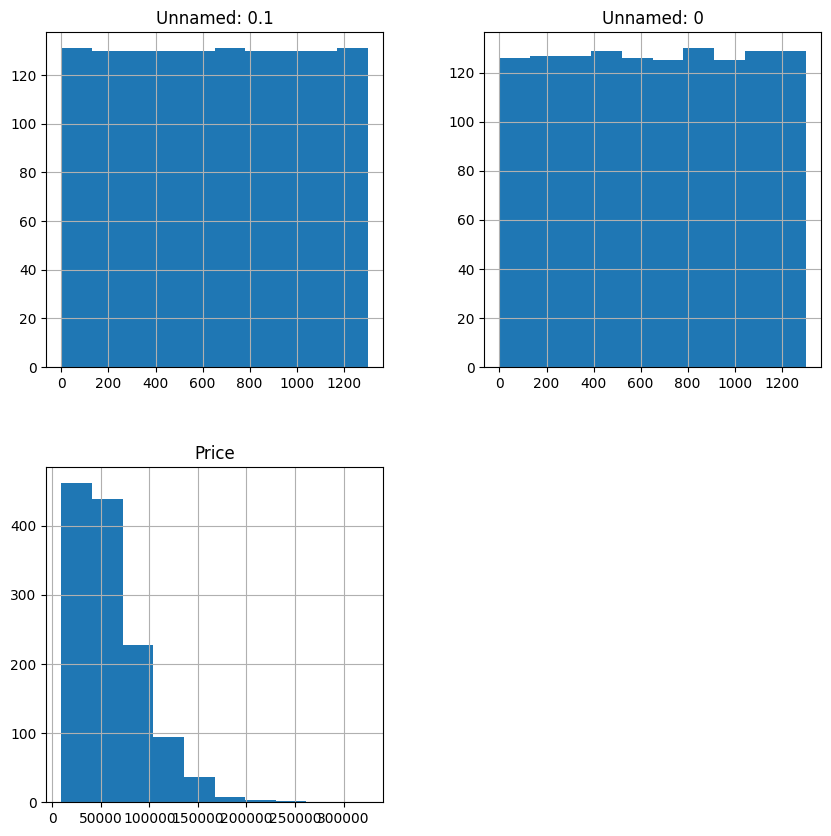

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/laptop.csv')

# Basic exploration
print(df.info())
print(df.describe())

# Histogram of numerical features
df.hist(figsize=(10, 10))
plt.show()

# # Correlation heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.show()

Scale Numerical Features

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

Split Data

In [35]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

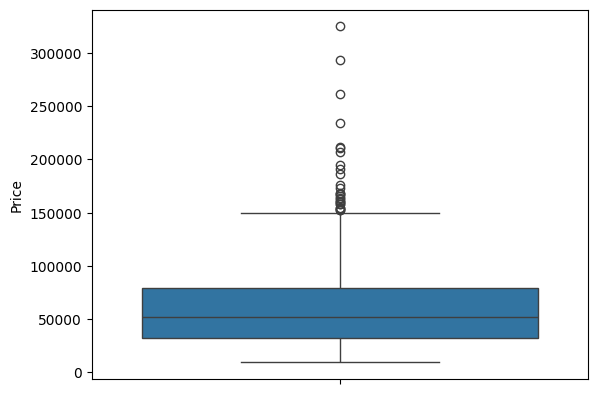

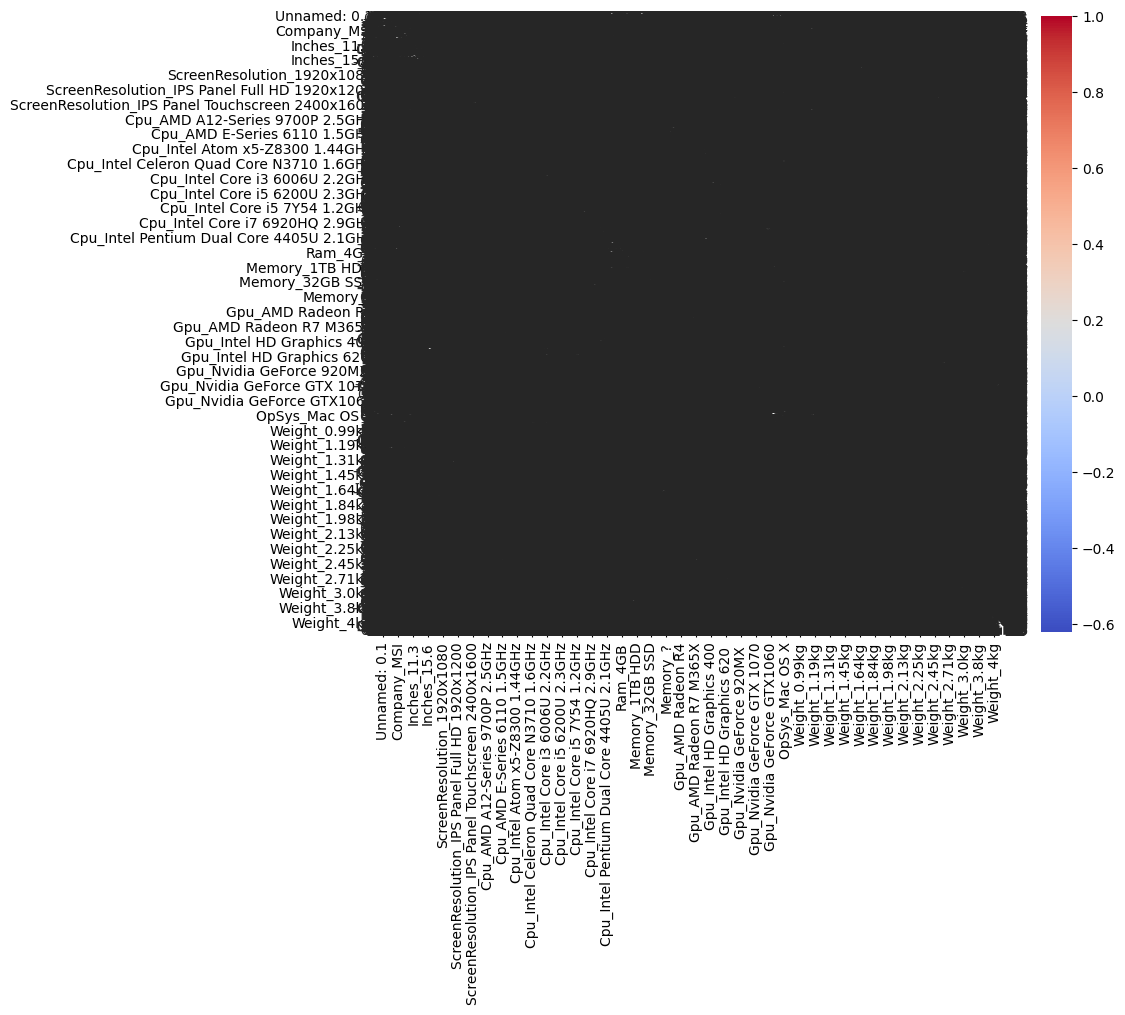

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot the boxplot for 'Price'
sns.boxplot(df['Price'])
plt.show()

# Remove outliers using IQR method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price'] >= (Q1 - 1.5 * IQR)) & (df['Price'] <= (Q3 + 1.5 * IQR))]

# Encode categorical columns
# For 'Brand', 'Operating System', etc., you can use pd.get_dummies or LabelEncoder
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encoding of categorical variables

# Plot the correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

Linear Regression


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
       Unnamed: 0.1   Unnamed: 0          Price
count    1303.00000  1273.000000    1273.000000
mean      651.00000   652.6

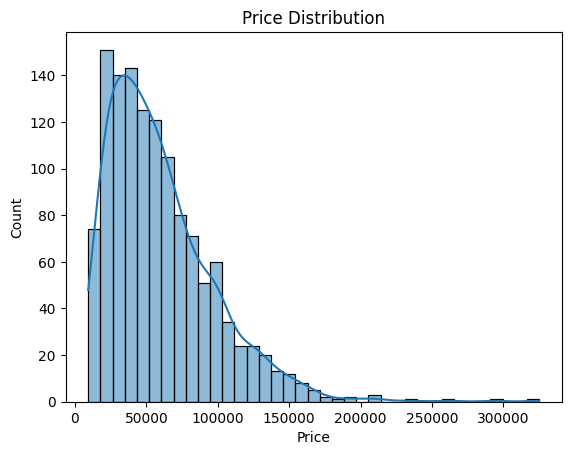

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


In [38]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('/content/laptop.csv')

# Check structure of the dataset
df.info()

# Summary statistics
print(df.describe())

# Visualize distribution of key features
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

# # Correlation heatmap to identify relationships between features
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Feature Correlation')
# plt.show()

# # Investigate any patterns or anomalies
# sns.boxplot(x='Brand', y='Price', data=df)
# plt.xticks(rotation=90)
# plt.title('Price vs Brand')
# plt.show()

# Check for missing values
print(df.isnull().sum())


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/laptop.csv')

# Handling missing values by filling with median
df['Ram'] = df['Ram'].fillna(df['Ram'].median())
df['Memory'] = df['Memory'].fillna(df['Memory'].median())

# Cleaning 'Ram' and 'Memory' columns by removing 'GB' and converting them to integers
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Memory'] = df['Memory'].str.replace('GB', '').astype(int)

# Creating a binary target variable: 'Price_Category' (assuming high/low based on price)
df['Price_Category'] = (df['Price'] > df['Price'].median()).astype(int)

# Selecting numerical features for scaling
numerical_columns = ['Ram', 'Memory', 'Price']

# Initialize StandardScaler and scale numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Defining feature matrix X and target vector y
X = df[numerical_columns]  # You can add more features here
y = df['Price_Category']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression

X-G Boost

In [11]:
!pip install xgboost


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Load the dataset
df = pd.read_csv('/content/laptop.csv')

# # Handling missing values by filling with the median
df['Ram'] = df['Ram'].fillna(df['Ram'].median())
df['Memory'] = df['Memory'].fillna(df['Memory'].median())

# Cleaning 'Ram' and 'Memory' columns by removing 'GB' and converting to float
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)
df['Memory'] = df['Memory'].str.replace('GB', '').astype(float)

# Creating a binary target variable: 'Price_Category' (based on median price)
df['Price_Category'] = (df['Price'] > df['Price'].median()).astype(int)

# Selecting numerical features for scaling
numerical_columns = ['Ram', 'Memory', 'Price']

# Initialize StandardScaler and scale numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Defining feature matrix X and target vector y
X = df[numerical_columns]  # You can add more features if needed
y = df['Price_Category']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ValueError: could not convert string to float: '128GB SSD'

RandomForestRegression

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/laptop.csv')

# Handling missing values by filling them with the median
df['Ram'] = df['Ram'].fillna(df['Ram'].median())
df['Memory'] = df['Memory'].fillna(df['Memory'].median())
df['Price'] = df['Price'].fillna(df['Price'].median())  # Ensure no missing values in target

# Clean 'Ram' and 'Memory' columns by removing 'GB' and converting to numeric
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)
df['Memory'] = df['Memory'].str.replace('GB', '').astype(float)

# Selecting the features and target variable
numerical_columns = ['Ram', 'Memory']  # You can add more features if necessary
X = df[numerical_columns]
y = df['Price']

# Scaling the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


TypeError: could not convert string to float: '8GB'

OneHot Encoding

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/laptop.csv')

# Handling missing values
df['Ram'] = df['Ram'].fillna(df['Ram'].median())
df['Memory'] = df['Memory'].fillna(df['Memory'].median())
df['Price'] = df['Price'].fillna(df['Price'].median())

# Clean 'Ram' and 'Memory' columns by removing 'GB' and converting to numeric
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)
df['Memory'] = df['Memory'].str.replace('GB', '').astype(float)

# Selecting the features and target variable
# Adding categorical columns: Brand and Processor Type
categorical_columns = ['Brand', 'Processor Type']
numerical_columns = ['Ram', 'Memory']

# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Target variable
y = df_encoded['Price']

# Dropping the target column from the features
X = df_encoded.drop(columns=['Price'])

# Scaling the numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Feature Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to an ordinal categorical column, e.g., 'Processor Type'
df['Processor_Type_Label'] = label_encoder.fit_transform(df['Processor Type'])

# You can inspect the encoded values
print(df[['Processor Type', 'Processor_Type_Label']].head())
# Apply One-Hot Encoding to nominal categorical columns, e.g., 'Brand' and 'Processor Type'
df_one_hot_encoded = pd.get_dummies(df, columns=['Brand', 'Processor Type'], drop_first=True)

# View the resulting DataFrame after encoding
print(df_one_hot_encoded.head())
# Example of Target Encoding (manual approach)
mean_encoded = df.groupby('Brand')['Price'].mean()

# Replace the 'Brand' column with the mean price of each brand
df['Brand_Target_Encoded'] = df['Brand'].map(mean_encoded)

print(df[['Brand', 'Price', 'Brand_Target_Encoded']].head())
!pip install category_encoders
from category_encoders import BinaryEncoder

# Initialize Binary Encoder
binary_encoder = BinaryEncoder(cols=['Processor Type'])

# Apply Binary Encoding
df_binary_encoded = binary_encoder.fit_transform(df['Processor Type'])

print(df_binary_encoded.head())
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/laptop.csv')

# Handle missing values
df['Ram'] = df['Ram'].fillna(df['Ram'].median())
df['Memory'] = df['Memory'].fillna(df['Memory'].median())
df['Price'] = df['Price'].fillna(df['Price'].median())

# Clean 'Ram' and 'Memory' columns by removing 'GB' and converting to numeric
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)
df['Memory'] = df['Memory'].str.replace('GB', '').astype(float)

# Apply One-Hot Encoding to categorical columns: 'Brand' and 'Processor Type'
df_encoded = pd.get_dummies(df, columns=['Brand', 'Processor Type'], drop_first=True)

# Target variable (Price)
y = df_encoded['Price']

# Feature variables
X = df_encoded.drop(columns=['Price'])

# Scale numerical features
scaler = StandardScaler()
X[['Ram', 'Memory']] = scaler.fit_transform(X[['Ram', 'Memory']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R-squared: {r2:.2f}")


KeyError: 'Processor Type'